# Assignment 1
**CS283 Computer Vision, Harvard University, Fall 2019**

**Due Wednesday, Sep. 18, at 5:00pm**

Name: Natalia Pacheco-Tallaj

---

The intended outcomes of this assignment are for you to be familiar with Python as a tool for manipulating images and to deepen your understanding of model-fitting and the two-dimensional projective plane. There is a **Hints and Information** section at the end of this document that is likely to help you a lot. This will be a common feature in future assignments.

Assignments in this course will use Python 3. The skeleton code we provide will only be tested on JupyterHub (via the course webpage) using a Python 3 notebook and certain pre-installed packages (inlcuding numpy, scipy, and opencv). Likewise, we expect any code that you submit to execute in the course's JupyterHub environment.

The input image files that are required to complete this assignment can be found in the <tt>pset1.zip</tt> archive that accompanies this notebook on the course website. Be sure to upload this ZIP archive tp JupterHub before running the notebook's first cell (which unpacks the archive into a <tt>./pset1</tt> folder). This will be another common feature in future assignments.

You will submit your work by editing this notebook and uploading it to the submission system on the course website. It is important that your submission executes and, as much as possible, maintains the notebook's original formatting. Submissions that do not execute or that deviate substantially in terms of formatting risk not being graded. Please read the **CS283 Assignment Submission Guidelines** for more detailed instructions.

Remember that the online submission system closes *exactly* at the stated deadline. If you find yourself in the uncomfortable position of working very close to the deadline, we advise that you upload early and often.

In [108]:
# Extract required pset files 

import os             # for file handling
import zipfile as zf  # For unpacking pset ZIP archives

# Extract required pset files 
assert os.path.exists("./pset1.zip"), 'Upload the pset ZIP archive and then re-run the cell.'
files = zf.ZipFile("./pset1.zip", 'r')
files.extractall('.')
files.close()

In [109]:
# Import other required libraries here
import cv2           # OpenCV
import numpy as np   # numpy

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters before specific plots.
plt.rcParams['figure.figsize'] = [10, 10]

## Question 1 (10 points)

In the <tt>./pset1/data</tt> folder there is a color image called <tt>baboon.tif</tt>.  This image appears frequently in the image processing literature. 

**a.** Write a sequence of Python commands that loads the image using OpenCV and reports its height and width in pixels.

*Hints: See OpenCV documentation for <tt>cv2.imread()</tt> and the <tt>shape</tt> attribute of numpy arrays. Use the built-in Python function <tt>print()</tt> for display text (and note that, unlike Python 2, Python 3 requires parentheses for this function). The <tt>format()</tt> method for string formatting may also be useful.*

In [110]:
img = cv2.imread('./pset1/data/baboon.tif')
# img.shape returns (#rows, #columns) which is (height, width)
print("The image has height {} and width {} in pixels.".format(img.shape[0],img.shape[1]))

The image has height 512 and width 512 in pixels.


**b.**  Write a sequence of Python commands that converts this image to a grayscale image and displays it using the matplotlib package. In addition, display three other grayscale images that correspond to each of the three separate RGB color components. To do this you will need to understand the way OpenCV represents RGB images and how to decompose them.  Use the <tt>subplot</tt> command of the <tt>matplotlib.pyplot</tt> package to display the four results in a single row.

*Hints: See OpenCV documentation for <tt>cv2.cvtColor()</tt> and matplotlib documentation for <tt>matplotlib.pyplot.imshow()</tt>. To pretty up your plots, see the commands <tt>matplotlib.pyplot.axis()</tt> and <tt>matplotlib.pyplot.title()</tt>. Also note that by default, OpenCV loads images in BGR order and not RGB.*

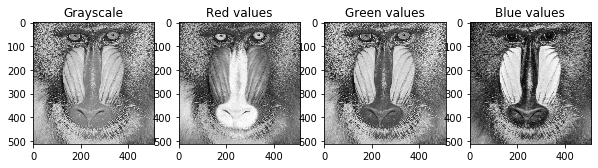

In [111]:
img = cv2.imread('./pset1/data/baboon.tif')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# TODO: is there a more effective way to do this
img_blue = [[a[0] for a in img[i]] for i in range(img.shape[0])] 
img_green = [[a[1] for a in img[i]] for i in range(img.shape[0])] 
img_red = [[a[2] for a in img[i]] for i in range(img.shape[0])] 

# I put the images in order RGB instead of BGR because the problem statement says RGB
plt.subplot(141, title='Grayscale').imshow(img_gray, cmap = 'gray')
plt.subplot(142, title='Red values').imshow(img_red, cmap = 'gray')
plt.subplot(143, title='Green values').imshow(img_green, cmap = 'gray')
plt.subplot(144, title='Blue values').imshow(img_blue, cmap = 'gray')

**c.** You can use the <tt>cv2.imwrite()</tt> command to write an image to a file in various formats with varying levels of compression. Write code that creates a new JPEG version of the original color image with a quality setting of 95 to the file <tt>baboon_compressed.jpg</tt>, and then reads and displays this new image next to the original image in a single row using <tt>subplot</tt>. Can you tell the difference between the compressed image and the original? 

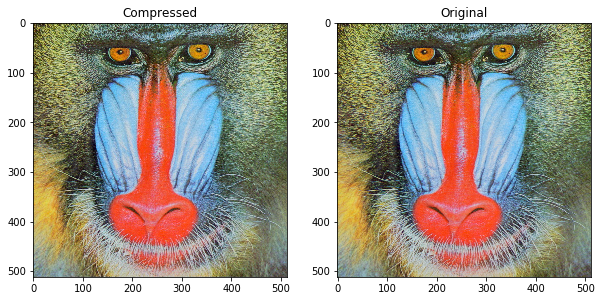

In [112]:
# the default value of CV_IMWRITE_JPEG_QUALITY 
# is 95 so it wasn't necessary to write it but 
# I wrote it out to make it explicit
img = cv2.imread('./pset1/data/baboon.tif')
outpath = './pset1/data/'
cv2.imwrite(outpath + 'baboon_compressed.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 95])

compressed_img = cv2.imread('./pset1/data/baboon_compressed.jpg')

plt.subplot(121, title='Compressed').imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB)) #switch it to rgb
plt.subplot(122, title='Original').imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Answer:
They look the same to me, even when I zoom in!

**d.** The compression ratio is the ratio between the size of the original file and the size of the compressed file (in bytes). The following cell will query the file sizes and report them. Based on the cell's output (you may need to modify the cell to point to the correct location of your compressed image file), what is the compression ratio for this quality setting of 0.95?

In [113]:
filesize = os.path.getsize('./pset1/data/baboon.tif')
filesize_compressed = os.path.getsize('./pset1/data/baboon_compressed.jpg')
print("The original file is {} bytes and the compressed one is {} bytes.".format(filesize, filesize_compressed))

The original file is 793580 bytes and the compressed one is 191318 bytes.


### Answer:
The compression ratio is $\frac{793580}{191318} \approx 4.15$.

**e.** Write code in the following cell that allows you to experiment with the JPEG quality settings, allowing you to visually compare the original and compressed images and also see the compression ratio for any quality setting you desire. Using this code, determine the smallest quality value for which the compressed image is indistinguishable from the original. What is this quality value and what is the associated compression ratio?

<IPython.core.display.Javascript object>


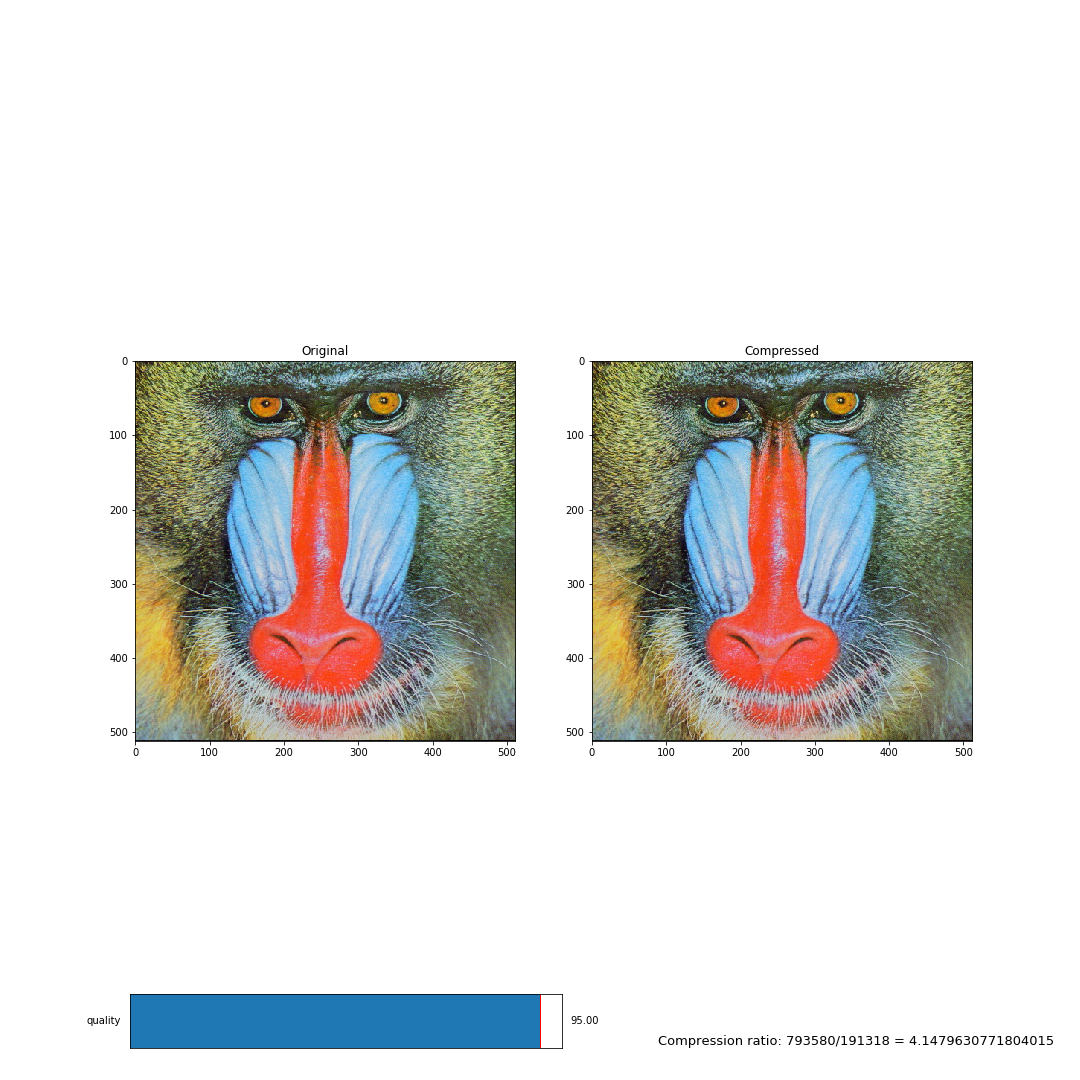

In [114]:
%matplotlib notebook 
from matplotlib.widgets import Slider # Matplotlib slider widget

img = cv2.imread('./pset1/data/baboon.tif')
outpath = './pset1/data/'

fig, (orig, compressed) = plt.subplots(1, 2)
orig.set_title('Original')
compressed.set_title('Compressed')
plt.subplots_adjust(bottom=0.1)
sliderbox = plt.axes([0.12, 0.03, 0.4, 0.05])
databox = plt.axes([0.6, 0.03, 0.3, 0.05])

filesize = os.path.getsize('./pset1/data/baboon.tif')
filesize_compressed = os.path.getsize('./pset1/data/baboon_compressed.jpg')
databox.axis('off')

databox.text(0.03, 0.04, 
             'Compression ratio: {}/{} = {}'.format(filesize, filesize_compressed, float(filesize)/filesize_compressed), 
             fontsize=13)

sliderw = Slider(sliderbox, 'quality', 0, 100, valinit=95)

orig.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
compressed.imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))

def compressimage(quality):
    cv2.imwrite(outpath + 'baboon_compressed.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, int(quality)])
    compressed_img = cv2.imread('./pset1/data/baboon_compressed.jpg')
    orig.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    compressed.imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
    
    filesize = os.path.getsize('./pset1/data/baboon.tif')
    filesize_compressed = os.path.getsize('./pset1/data/baboon_compressed.jpg')
        
    databox.cla()
    databox.axis('off')
    databox.text(0.03, 0.04, 
                 'Compression ratio: {}/{} = {}'.format(filesize, filesize_compressed, float(filesize)/filesize_compressed), 
                 fontsize=13)

    
sliderw.on_changed(compressimage)

plt.show()



In [84]:
# toggle
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 15]

### Answer:

To my eyes, the lowest quality value at which they are indistinguishable is about 12%, with compression ratio around 44. Anything below that and the right image looks clearly more pixelated. The number might be very low because the images are not that large on my screen. 

## Question 2 (10 points)

The <tt>./pset1/data</tt> folder contains another popular image, <tt>cameraman.tif</tt>.

**a.** Write code that loads the image, converts it to grayscale, uses a random number generator to select exactly 10% of the pixels, and then replaces their gray-level values with independent, random integers uniformly distributed between 0 and 255. Display the result. Next, use subplot to display two more results beside this one, where the percentage of randomly replaced pixels in the original image is 25% and 50%, respectively. 

*Hints: The functions <tt>numpy.random.choice()</tt> and <tt>numpy.random.randint()</tt>, as well as the <tt>flat</tt> attribute of numpy arrays may be useful.*

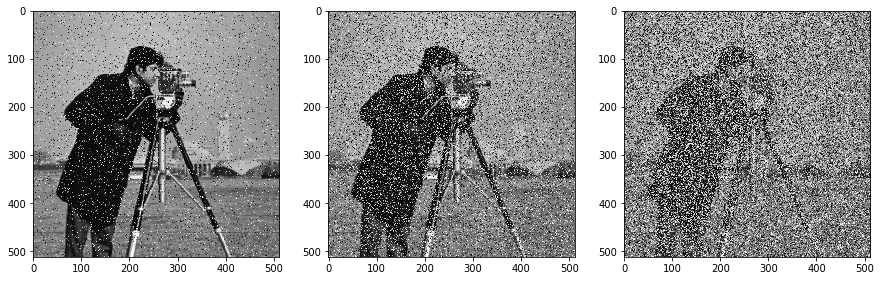

In [23]:
# The 0 flag loads the image as grayscale
img = cv2.imread('./pset1/data/cameraman.tif', 0)
new_images = [img, img, img]

# when image is grayscale, img.shape is an ordered pair
height, width = img.shape
pix_size = height * width

percents = [10/100. * pix_size,
            25/100. * pix_size,
            50/100. * pix_size]

# these are strings and not touples because random.choice 
# only takes 1-dimensional arrays
a = ['{} {}'.format(i,j) for i in range(height) for j in range(width)]

for k in range(len(percents)): 
    change_pix = np.random.choice(a, int(percents[k]), replace=False)
    
    for idx in change_pix: 
        i,j = [int(b) for b in idx.split(' ')]
        new_images[k][i][j] = np.random.randint(255)

    plt.subplot(int('13{}'.format(k+1))).imshow(new_images[k], cmap='gray')

## Question 3 (30 points)

There is a set of points $\tilde{\mathbf{x}}_i=(x_i,y_i)$ in the image plane and we want to find the best line passing through them. 

The next cell defines two functions that calculate the line in two different ways using two different measures of quality. In both functions, the input is two $N\times 1$ numpy arrays with inhomogeneous coordinates, $\{x_i\}$ and $\{y_i\}$, of $N$ points. The output is the coordinates of a line $\boldsymbol\ell=(a,b,c)$.

1. The function <tt>fit_line_vertical()</tt> solves the problem by finding $(a, c)$ (setting $b = 1$) that most closely satisfy the
equations $y_i=-ax_i-c$, in a least-squares sense. It minimizes the sum of squares of vertical distances between the points and the line by encoding the constraints in matrix form
\begin{equation*}
\left.
\begin{array}{c}
-a x_1 - c = y_1 \\
-a x_2 - c = y_2 \\
\vdots \\
-a x_N - c = y_N
\end{array} \right\} \Rightarrow \underbrace{\begin{bmatrix}
-x_1 & -1 \\
-x_2 & -1 \\
\vdots & \vdots \\
-x_N & -1
\end{bmatrix}}_{\bf A} \cdot \underbrace{\begin{bmatrix}
a \\
c
\end{bmatrix}}_{\bf v} = \underbrace{\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}}_{\bf b}
\end{equation*}
and solving
\begin{equation*}
\text{arg}\min_\mathbf{v}\|\mathbf{A}\mathbf{v}-\mathbf{b}\|^2.
\end{equation*}

2. The function <tt>fit_line_homogeneous()</tt> solves the problem by finding $\boldsymbol\ell=(a,\ b,\ c)$ that most closely satisfies the equations $ax_i+by_i+c=0$, in a least-squares sense. That is, it minimizes the sum of homogeneous algebraic errors, $\sum\left(\boldsymbol\ell^\top \mathbf{x}_i\right)^2$ with $\mathbf{x}_i\triangleq(x_i,y_i,1)$. It does this by encoding the constraints in matrix form
\begin{equation*}
\underbrace{\begin{bmatrix}
x_1 & y_1 & 1 \\
x_2 & y_2 & 1 \\
\vdots & \vdots \\
x_N & y_N & 1 \\
\end{bmatrix}}_{\bf A} \cdot \underbrace{\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}}_{\boldsymbol\ell} = \underbrace{\begin{bmatrix}
0 \\
0 \\
\vdots \\
0
\end{bmatrix}}_{\bf 0}
\end{equation*}
and solving
\begin{equation*}
\text{arg}\min_\boldsymbol\ell\|\mathbf{A}\boldsymbol\ell\|^2\quad \text{ such that } \|\boldsymbol\ell\|=1.
\end{equation*}

In [24]:
def fit_line_vertical(x, y):
    # Method A: linear regression (vertical distance)
    
    # Construct the Nx2 "A matrix"
    A = -np.concatenate([x[:, np.newaxis], np.ones((x.size, 1))], axis=1)

    # Least squares solution
    l = np.linalg.lstsq(A, y, rcond=None)[0]

    # Format line as (a,b,c)
    return l[0], 1.0, l[1]

def fit_line_homogeneous(x, y):
    # Method B: Naive homogeneous
    
    # Construct the "A matrix"
    A = np.concatenate([x[:, np.newaxis], y[:, np.newaxis], np.ones((x.size, 1))], axis=1)

    # SVD
    _, _, V = np.linalg.svd(A)

    # Extract last column of V matrix (note that np.linalg.svd() returns a transposed version of V)
    l = V[2, :]

    return l

**a.** Write code that loads the image <tt>dots.tif</tt> (from the <tt>./pset1/data</tt> folder, as usual) and: i) detects the red, green, and  blue points and obtain their $(x,y)$ image coordinates; ii) calls the functions <tt>fit_line_vertical()</tt> and <tt>fit_line_homogeneous()</tt> to fit two different lines to each set of points; and iii) plots these lines (two lines for each color) superimposed on the image.

*Hints: The functions <tt>numpy.nonzero()</tt>, <tt>numpy.concatenate()</tt>, and <tt>numpy.bitwise_and()</tt> may be useful. You may also want to use <tt>matplotlib.pyplot.xlim()</tt> and <tt>matplotlib.pyplot.ylim()</tt> for plotting. Note that flipping the limits in <tt>matplotlib.pyplot.ylim()</tt> flips the y axis, which may be desirable for images.*

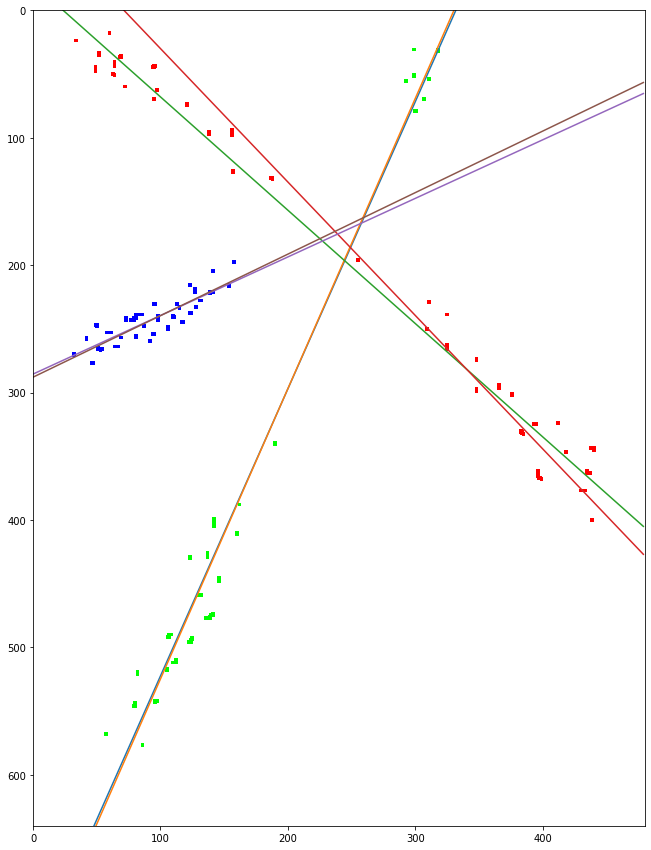

In [25]:
img = cv2.imread('./pset1/data/dots.tif')
# matplotlib uses RGB so lets do that
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.ylim((img.shape[0], 0))
plt.xlim((0,img.shape[1]))

green_x = []
green_y = []
blue_x  = []
blue_y  = []
red_x   = []
red_y   = []

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        # red
        if img[row][col][1] < 255 and img[row][col][2] < 255:
            red_x.append(col)
            red_y.append(row)
        # green
        elif img[row][col][0] < 255 and img[row][col][2] < 255:
            green_x.append(col)
            green_y.append(row)
        # blue
        elif img[row][col][0] < 255 and img[row][col][1] < 255:
            blue_x.append(col)
            blue_y.append(row)


vertical_green = fit_line_vertical(np.array(green_x), np.array(green_y))
homogeneous_green = fit_line_homogeneous(np.array(green_x), np.array(green_y))
# normalize such that y = -ax - b
homogeneous_green = homogeneous_green * (1. / homogeneous_green[1])

vertical_red = fit_line_vertical(np.array(red_x), np.array(red_y))
homogeneous_red = fit_line_homogeneous(np.array(red_x), np.array(red_y))
homogeneous_red = homogeneous_red * (1. / homogeneous_red[1])

vertical_blue = fit_line_vertical(np.array(blue_x), np.array(blue_y))
homogeneous_blue = fit_line_homogeneous(np.array(blue_x), np.array(blue_y))
homogeneous_blue = homogeneous_blue * (1. / homogeneous_blue[1])

x = np.array(range(img.shape[1]))
ygv = -1 * vertical_green[0] * x - vertical_green[2]
ygh = -1 * homogeneous_green[0]* x - homogeneous_green[2]
yrv = -1 * vertical_red[0] * x - vertical_red[2]
yrh = -1 * homogeneous_red[0]* x - homogeneous_red[2]
ybv = -1 * vertical_blue[0] * x - vertical_blue[2]
ybh = -1 * homogeneous_blue[0]* x - homogeneous_blue[2]


plt.plot(x,ygv)
plt.plot(x,ygh)
plt.plot(x,yrv)
plt.plot(x,yrh)
plt.plot(x,ybv)
plt.plot(x,ybh)

plt.imshow(img)

**b.** Neither of the two solutions from part (a) minimize the sum of squares of perpendicular distances between the points and the line, which for a single point is 

\begin{equation*}
 \frac{|a x_i + b y_i + c|}{\sqrt{a^2 + b^2}}.
\end{equation*}

Write code for a new function <tt>fit_line_perpendicular()</tt> that has the same input and output as the previous functions but that provides a solution that minimizes the sum of squares of perpendicular distances.

Also, write code (adapted from (a)) that calls the function <tt>fit_line_perpendicular()</tt> and plots the fitted lines (one line for each color) superimposed on the image <tt>dots.tif</tt>.

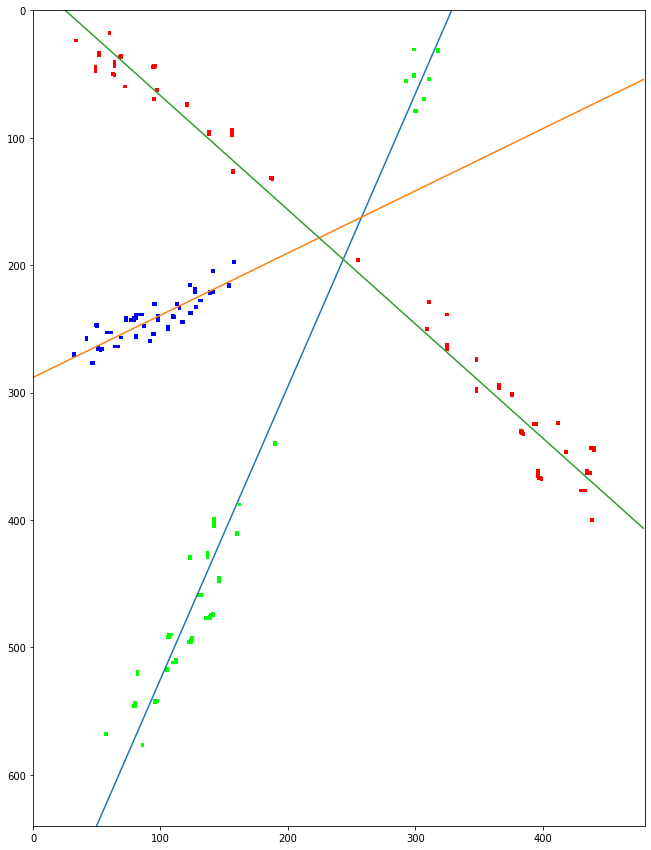

In [26]:
def fit_line_perpendicular(x, y):
    # Step 1: translate coordinate system toward centroid
    xx = np.mean(x)
    yy = np.mean(y)
    x = x - xx
    y = y - yy
    
    # Step 2: the perpendicular distance from (xi, yi) to any 
    # particular line L through the centroid is the dot product
    # (xi, yi) * (a', b') for (a', b') a unit vector perp to L
    
    # Construct the A matrix
    A = np.concatenate([x[:, np.newaxis], y[:, np.newaxis]], axis=1)
    
    # SVD
    _, _, V = np.linalg.svd(A)
    
    # Normal unit vector that minimizes norm(A * (aa,bb))^2
    aa, bb = V[1, :]
    
    # Step 3: translate back to original coordiante system
    # we want the line through (xx, yy) normal to l_normal
    # This means (x-xx, y-yy)*(aa,bb) = 0, so
    # aa * x - xx * aa + bb * y - yy * bb = 0, i.e.
    # (aa, bb, -xx * aa - yy * bb) * (x, y, 1) = 0
    return np.array([aa, bb, - xx * aa - yy * bb])
    
###########################################################
# REPEATED CODE FROM PART A:                              #
# GETTING THE COORDINATES OF THE GREEN, BLUE, AND RED PTS #
###########################################################
img = cv2.imread('./pset1/data/dots.tif')
# matplotlib uses RGB so lets do that
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.ylim((img.shape[0], 0))
plt.xlim((0,img.shape[1]))

green_x = []
green_y = []
blue_x  = []
blue_y  = []
red_x   = []
red_y   = []

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        # red
        if img[row][col][1] < 255 and img[row][col][2] < 255:
            red_x.append(col)
            red_y.append(row)
        # green
        elif img[row][col][0] < 255 and img[row][col][2] < 255:
            green_x.append(col)
            green_y.append(row)
        # blue
        elif img[row][col][0] < 255 and img[row][col][1] < 255:
            blue_x.append(col)
            blue_y.append(row)
    
###########################################################
#                CODE SPECIFIC TO THIS PART               #      
###########################################################
green_line = fit_line_perpendicular(np.array(green_x), np.array(green_y)) 
green_line = green_line * (1. / green_line[1])
blue_line  = fit_line_perpendicular(np.array(blue_x), np.array(blue_y))
blue_line  = blue_line * (1. / blue_line[1])
red_line   = fit_line_perpendicular(np.array(red_x), np.array(red_y))
red_line   = red_line * (1 / red_line[1])

x = np.array(range(img.shape[1]))
yg = -1 * green_line[0] * x - green_line[2]
yb = -1 * blue_line[0] * x - blue_line[2]
yr = -1 * red_line[0] * x - red_line[2]

plt.plot(x,yg)
plt.plot(x,yb)
plt.plot(x,yr)

plt.imshow(img)

**c.** These lines do not intersect at a point, but we can find a point that comes "closest" to a three-way intersection by finding the point that minimizes the sum of squared perpendicular distances from the point to the three lines found in part (b). For this, you should create a procedure that is analogous to the method you implemented in part (b): formulate and solve an appropriate linear system of the form ${\bf A}{\bf x}={\bf 0}$ with constraints on the solution ${\bf x}$. Using words and equations, describe your construction of such a constrained linear system and explain why its solution is the minimum of the sum of squared perpendicular distances. Write code that implements your constructioon, computes the "best point", and displays this point superimposed on the image and with the three lines found in (b).

### Answer:

We want to find a point $(x,y)$ that minimizes the perpendicular distances to three lines $l_i = (a_i, b_i, c_i), i = 1,2,3$ in a least squared sense, where $l_i$ is given by the points satisfying $a_i x + b_i y + c_i = 0$. 
If a line $l$ goes through the origin, the perpendicular distance from $(x, y)$ to $l$ is given by $(x,y)\cdot \vec{u}$ for some unit vector $\vec{u}$ perpendicular to $l$. If a line $l$ does not go through the origin, we can simply pick some point $(x', y')\in l$ and compute the perpendicular distance as $(x-x', y-y')\cdot \vec{u}$ for some unit vector perpendicular to $l$ (this is equivalent to translating our coordinate system so that $l$ passes through the origin, computing the perpendicular distance to the translated point $(x-x',y-y')$, and then translating back). 

Thus, we only need to find a point in each of the $l_i$'s and a unit vector $u_i$ perpendicular to $l_i$ in order to compute the perpendicular distance from $(x,y)$ to $l_i$. For a point in $l_i$, simply take 
$(x_i, y_i) = (1, -\frac{a_i + c_i}{b_i})$. Notice that $l_i$ has slope $\frac{-a_i}{b_i}$ so all its perpendicular lines have slope $\frac{b_i}{a_i}$ (lines with slope $\frac{-1}{m}$ are perpendicular to lines with slope $m$). Thus a unit normal to $l_i$ is 
$$u_i =\frac{\left(1, \frac{b_i}{a_i}\right)}{\left|\left|\left(1, \frac{b_i}{a_i}\right)\right|\right|} = \left(\frac{1}{\sqrt{1 + \left(\frac{b_i}{a_i}\right)^2}}, \frac{b_i}{a_i\sqrt{1 + \left(\frac{b_i}{a_i}\right)^2}}\right)$$
Denote this by $u_i = (z_i, w_i)$
Then we want to minimize the dot products
 $$(x-x_i, y-y_i)\cdot u_i = z_ix - z_ix_i + w_iy - w_iy_i$$
 in a least squares sense, which means we want to find $(x,y)$ that minimizes the squared norm of 
 $$\begin{pmatrix}z_1 & w_1 & -z_1x_1 - w_1y_1 \\
 z_2 & w_2 & -z_2x_2 - w_2y_2\\
 z_3 & w_3 & -z_3x_3 - w_3y_3\end{pmatrix}\begin{pmatrix}x \\ y \\ 1\end{pmatrix} $$
 That is, for a point that is in fact an intersection of the three lines we would have 
 $$\begin{pmatrix}z_1 & w_1 & -z_1x_1 - w_1y_1 \\
 z_2 & w_2 & -z_2x_2 - w_2y_2\\
 z_3 & w_3 & -z_3x_3 - w_3y_3\end{pmatrix}\begin{pmatrix}x \\ y \\ 1\end{pmatrix}  = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $$
 Equivalently, we want the least-squares solution to
    $$\underbrace{\begin{pmatrix}z1 & w1\\ z2 & w2 \\ z3 & w3\end{pmatrix}}_{\mathbf{A}}\underbrace{\begin{pmatrix} x\\ y\end{pmatrix}}_{\mathbf{v}} = \underbrace{\begin{pmatrix}z_1x_1 + w_1y_1\\ z_2x_2 + w_2y_2\\ z_3x_3 + w_3y_3\end{pmatrix}}_{\mathbf{b}} $$
So we want to solve $$ \text{arg}\min_{\mathbf{v} = (x,y)}\|\mathbf{A}\mathbf{v} - \mathbf{b}\|^2$$
 

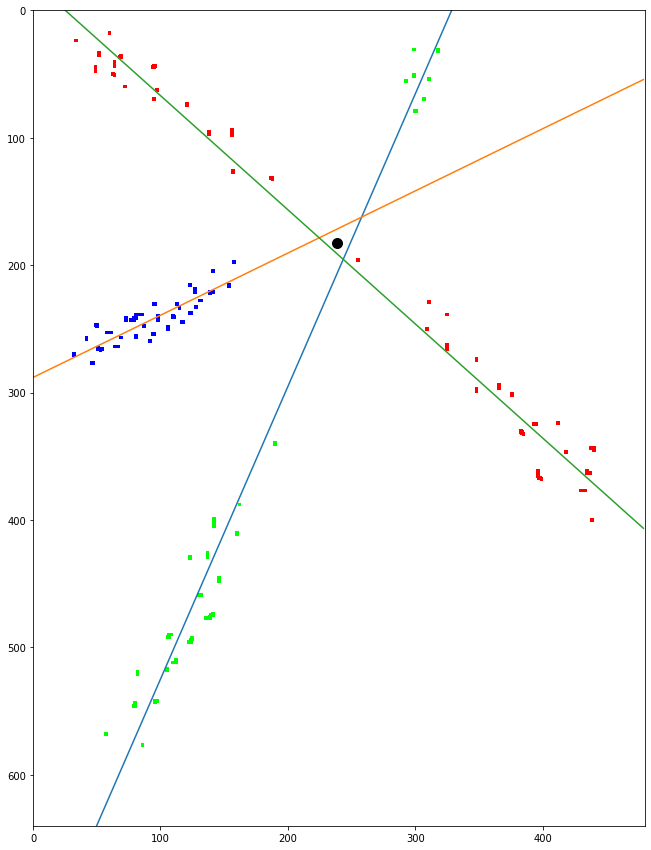

In [31]:
###########################################################
# CODE SPECIFIC TO THIS PART:                             # 
# DEFINING THE FUNC THAT APPROXIMATES THE INTERSECTION    #
###########################################################
def approximate_intersection(l1, l2, l3):
    # compute points on each line l1, l2, l3
    # as (1, yi) where yi = -(ai + ci)/bi
    y1 = -(l1[0] + l1[2])/l1[1]
    y2 = -(l2[0] + l2[2])/l2[1]
    y3 = -(l3[0] + l3[2])/l3[1]

    # compute unit normal as (1, bi/ai)/norm
    u1 = np.array([1, float(l1[1])/l1[0]])
    u2 = np.array([1, float(l2[1])/l2[0]])
    u3 = np.array([1, float(l3[1])/l3[0]])
    u1, u2, u3 = u1/np.linalg.norm(u1), u2/np.linalg.norm(u2), u3/np.linalg.norm(u3)
    
    A = np.concatenate([np.array([u1[0], u2[0], u3[0]])[:,np.newaxis], 
                        np.array([u1[1], u2[1], u3[1]])[:,np.newaxis]],
                       axis=1)
    b = np.array([u1[0]+u1[1]*y1, u2[0]+u2[1]*y2, u3[0]+u3[1]*y3])
    
    v = np.linalg.lstsq(A, b, rcond=None)[0]
    
    return v

###########################################################
# REPEATED CODE FROM PART A:                              #
# GETTING THE COORDINATES OF THE GREEN, BLUE, AND RED PTS #
###########################################################
img = cv2.imread('./pset1/data/dots.tif')
# matplotlib uses RGB so lets do that
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.ylim((img.shape[0], 0))
plt.xlim((0,img.shape[1]))

green_x = []
green_y = []
blue_x  = []
blue_y  = []
red_x   = []
red_y   = []

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        # red
        if img[row][col][1] < 255 and img[row][col][2] < 255:
            red_x.append(col)
            red_y.append(row)
        # green
        elif img[row][col][0] < 255 and img[row][col][2] < 255:
            green_x.append(col)
            green_y.append(row)
        # blue
        elif img[row][col][0] < 255 and img[row][col][1] < 255:
            blue_x.append(col)
            blue_y.append(row)
    
###########################################################
# CODE REPEATED FROM PART B:                              #     
# PLOTTING THE 3 PERPENDICULAR BEST FIT LINES             #
###########################################################
green_line = fit_line_perpendicular(np.array(green_x), np.array(green_y)) 
green_line = green_line * (1. / green_line[1])
blue_line  = fit_line_perpendicular(np.array(blue_x), np.array(blue_y))
blue_line  = blue_line * (1. / blue_line[1])
red_line   = fit_line_perpendicular(np.array(red_x), np.array(red_y))
red_line   = red_line * (1 / red_line[1])

x = np.array(range(img.shape[1]))
yg = -1 * green_line[0] * x - green_line[2]
yb = -1 * blue_line[0] * x - blue_line[2]
yr = -1 * red_line[0] * x - red_line[2]

plt.plot(x,yg)
plt.plot(x,yb)
plt.plot(x,yr)

###########################################################
#                CODE SPECIFIC TO THIS PART               #      
###########################################################

v = approximate_intersection(red_line, green_line, blue_line)
# shade in the intersection pt pixel with large black circular marker
plt.plot(v[0], v[1], 'ko', markersize=10)
plt.imshow(img)


## Question 4 (20 points)

In the presence of outliers, we require more robust techniques for model fitting. RANSAC is one such method that is both useful and conceptually simple.

**a.** Write code that loads the image <tt>./pset1/data/dots_outliers.tif</tt>, detects the coordinates of the white pixels in the image and then calls your function <tt>fit_line_perpendicular()</tt> to fit a line to these inlying points. Also, write code that displays your result superimposed on the image. Note that, in this case, the image is black-and-white, with the points being white (you may need to zoom-in to see the points clearly).

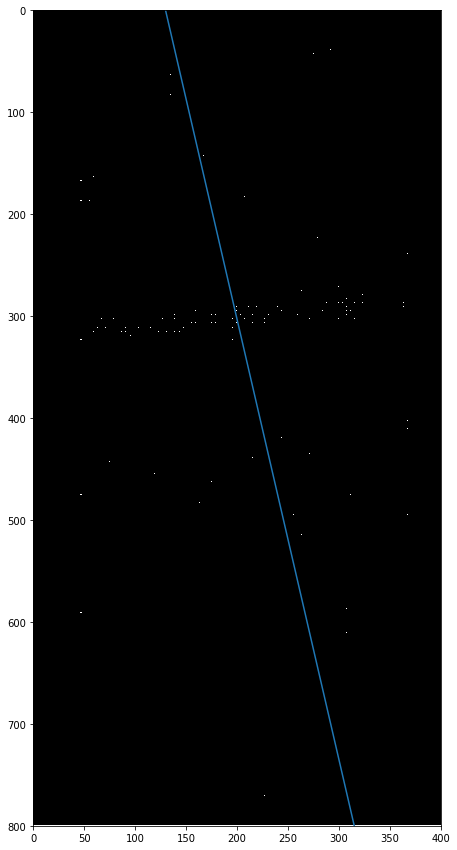

In [64]:
# As I understand the statement, we're using every white point
# as an "inlier" in Part a, and getting a horrible fit with our 
# non-iterative least-squares solution from before, and then in 
# Part b we're rectifying that error by actually picking a reasonable
# set of inliers with RANSAC

img = cv2.imread('./pset1/data/dots_outliers.tif')
plt.ylim((img.shape[0], 0))
plt.xlim((0,img.shape[1]))

white_x = []
white_y = []
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if img[row][col][0]& img[row][col][1] & img[row][col][2]:
            white_x.append(col)
            white_y.append(row)
line = fit_line_perpendicular(np.array(white_x), np.array(white_y))
line = line * (1 / line[1])

x = np.array(range(img.shape[1]))
y = -1 * line[0] * x - line[2]

plt.plot(x,y)
plt.imshow(img)

**b.** Write code that uses RANSAC to improve the fit and draw a better line, by first identifying a subset of inlying, nearly-collinear points, and then applying <tt>fit_line_perpendicular()</tt> to the inliers. We suggest that the number of iterations be 100 and the threshold used to determine the inlying set for each iteration be a distance of 20 pixels (as defined in the code below). Display your lines from both (a) and (b) together, superimposed on the original image.


/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


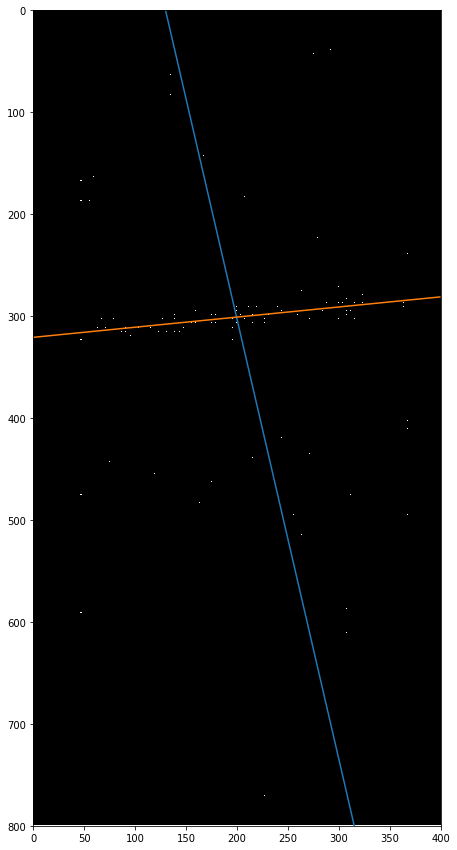

In [63]:
num_iter = 100        # number of RANSAC iterations
inlier_threshold = 20  # threshold for inlier set of each line

# copied the code for fit_line_perpendicular from previous part 
# so this cell can run independently
def fit_line_perpendicular(x, y):
    xx, yy = np.mean(x), np.mean(y)
    x, y = x - xx, y - yy
    A = np.concatenate([x[:, np.newaxis], y[:, np.newaxis]], axis=1)
    _, _, V = np.linalg.svd(A)
    aa, bb = V[1, :]
    return np.array([aa, bb, - xx * aa - yy * bb])

# measures perpendicular distance between a point and a line
# by the method I explained in my solution to 3c using a translation
# and a unit normal vector
# p: point given in inhomogeneous coordinates (x,y)
# l: given as triple (a,b,c) such that ax + by + c = 0
# unit testing for perp_dist
def perp_dist(p, l):
    # point (1, y) on l 
    # if the line passes through the origin
    if l[2] == 0:
        x, y = 0, 0
    else:
        x = 1
        y = -(l[0] + l[2])/float(l[1])
    
    if l[0] == 0:
        u = (0,1)
    else:
        u = np.array([1, float(l[1])/l[0]])
        u = u / np.linalg.norm(u)
    return abs(np.dot((p[0] - x, p[1] - y), u))

# ransac
# input: 
# x,y: arrays of x and y coordinates
# N: max number of iterations
# t: distance treshold to be considered an inlier
# T: size treshold for desired set of inliers, stop upon
#    reaching proportion T of pts or upon reaching N iterations
def ransac(x, y, N = num_iter, t = inlier_threshold, T = .95):
    numpts = len(x)
    stopsize = T * numpts
    maxinliers = 0
    maxinlierline = (0,0,0)
    choice_space = np.array(range(numpts))
    # while less than N iterations
    its = 0
    while its < N:
        # randomly select sample of 2 points 
        i, j = np.random.choice(choice_space, 2, replace=False)
        l = np.cross([x[i], y[i], 1], [x[j], y[j], 1])
        inliers = 0
        for k in range(numpts):
            if perp_dist([x[k], y[k]], l) < t:
                inliers += 1
        if inliers > maxinliers:
            maxinliers = inliers
            maxinlierline = l 
        its+=1
        if maxinliers >= stopsize:
            its = N

    # determine the chosen set of inliers (consensus set)
    valid_pts_x = []
    valid_pts_y = []
    for k in range(numpts):
        if perp_dist([x[k], y[k]], maxinlierline) < t:
            valid_pts_x.append(x[k])
            valid_pts_y.append(y[k])

    assert(maxinliers == len(valid_pts_x))

    return fit_line_perpendicular(valid_pts_x, valid_pts_y)
    
# the code from part a
img = cv2.imread('./pset1/data/dots_outliers.tif')
plt.ylim((img.shape[0], 0))
plt.xlim((0,img.shape[1]))

white_x = []
white_y = []
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if img[row][col][0]& img[row][col][1] & img[row][col][2]:
            white_x.append(col)
            white_y.append(row)
line = fit_line_perpendicular(np.array(white_x), np.array(white_y))
line = line * (1 / line[1])

x = np.array(range(img.shape[1]))
y = -1 * line[0] * x - line[2]

# the new code
ransacline = ransac(white_x, white_y)
ransacline = ransacline * (1 / ransacline[1])
yransac    = -1 * ransacline[0] * x - ransacline[2]

plt.plot(x,y)
plt.plot(x,yransac)
plt.imshow(img)
        

In [61]:
# unit testing for perp_dist
def perp_dist(p, l):
    # point (1, y) on l 
    # if the line passes through the origin
    if l[2] == 0:
        x, y = 0, 0
    else:
        x = 1
        y = -(l[0] + l[2])/float(l[1])
    
    if l[0] == 0:
        u = (0,1)
    else:
        u = np.array([1, float(l[1])/l[0]])
        u = u / np.linalg.norm(u)
    return abs(np.dot((p[0] - x, p[1] - y), u))

# distance from (1,2) to y = 1-x is sqrt(2)
print(perp_dist((1,2), (1, 1, -1)), np.sqrt(2)) 
# distance from (0,3) to y = x is 3sqrt(2)/2
print(perp_dist((0,3), (-1, 1, 0)), 3 * np.sqrt(2) / 2)


1.414213562373095 1.4142135623730951
2.1213203435596424 2.121320343559643


## Question 5 (10 points)

Following Hartley & Zisserman, the notation in this question is such that ${\bf x}$ and $\tilde{\bf x}$ indicate homogeneous and inhomogeneous vectors, respectively. 

Consider a right triangle with vertices $\tilde{\bf x}_1=(0,\ 0)$, $\tilde{\bf x}_2=(m,\  0)$ and $\tilde{\bf x}_3=(0,\ m)$, and suppose this triangle is warped by an affine transformation such that
\begin{equation}\label{eq:affine}
\left(\begin{array}{c} x' \\ y' \\ 1\end{array}\right)=
\left[\begin{array}{ccc} a_{11} & a_{12} & t_x \\ a_{21} & a_{22} & t_y \\ 0 & 0 & 1\end{array}\right]
\left(\begin{array}{c} x \\ y \\ 1\end{array}\right),\nonumber
\end{equation}
or ${\bf x}'={\bf A}{\bf x}$.  Derive an expression for the area of the warped triangle defined by $\tilde{\bf x}'_1$, $\tilde{\bf x}'_2$ and $\tilde{\bf x}'_3$.  Use this expression to prove that if two right triangles (with $m=m_1$ and
$m=m_2$) are warped by the same affine transformation, the ratio of their areas is preserved.



### Answer:

First let us compute the coordinates of the warped points ${\bf x}'_1$, ${\bf x}'_2$ and ${\bf x}'_3$. 
\begin{align*}
    {\bf x}'_1 &= \begin{pmatrix} a_{11} & a_{12} & t_x \\ a_{21} & a_{22} & t_y \\ 0 & 0 & 1 \end{pmatrix}\begin{pmatrix} 0 \\ 0\\ 1\end{pmatrix} = \begin{pmatrix} t_x \\ t_y \\ 1\end{pmatrix}\\
    {\bf x}'_2 &= \begin{pmatrix} a_{11} & a_{12} & t_x \\ a_{21} & a_{22} & t_y \\ 0 & 0 & 1 \end{pmatrix}\begin{pmatrix} m \\ 0\\ 1\end{pmatrix} = \begin{pmatrix} a_{11}m + t_x \\ a_{21}m + t_y \\ 1\end{pmatrix}\\
    {\bf x}'_3 &= \begin{pmatrix} a_{11} & a_{12} & t_x \\ a_{21} & a_{22} & t_y \\ 0 & 0 & 1 \end{pmatrix}\begin{pmatrix} 0 \\ m\\ 1\end{pmatrix} = \begin{pmatrix} a_{12}m + t_x \\ a_{22}m + t_y \\ 1\end{pmatrix}
\end{align*}

So 
\begin{align*}
    \tilde{\bf x}'_1 &= (t_x, t_y)\\
    \tilde{\bf x}'_2 &= (a_{11}m + t_x, a_{21}m + t_y)\\
    \tilde{\bf x}'_3 &= (a_{21}m + t_x, a_{22}m + t_y)
\end{align*}
Since none of these points are at infinity (affine transformation!) we're working in $\mathbb{R}^2$. If we were in $\mathbb{R}^3$, given three distinct points $A, B, C$, the area of the triangle they form can be computed as half the area of the parallelogram spanned by $\vec{AB}, \vec{AC}$, which is $\frac{1}{2}||\vec{AB}\times\vec{AC}||$. Embed our copy of $\mathbb{R}^2$ in $\mathbb{R}^3$ as the plane at $z = 0$, so that we want to compute the area of the triangle between points $A = (t_x, t_y, 0)$, $B = (a_{11}m + t_x, a_{21}m + t_y, 0)$ and $C = (a_{21}m + t_x, a_{22}m + t_y, 0)$. We have that $\vec{AB} = B - A = (a_{11}m, a_{21}m, 0)$ and $\vec{AC} = C - A = (a_{21}m, a_{22}m, 0)$, so the area of the desired triangle is
$$New\_area = \frac{1}{2}\left||(a_{11}m, a_{21}m, 0)\times (a_{21}m, a_{22}m, 0)\right|| = \frac{1}{2}||(0,0,a_{11}a_{22}m^2 - a_{21}a_{12}m^2)|| = \frac{1}{2} m^2 \det\begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{pmatrix}$$
Note that the original area of the triangle formed by $\tilde{\bf x}_1, \tilde{\bf x}_2, \tilde{\bf x}_3$ was $\frac{1}{2}m^2$, so we've stretched the area by a constant factor of $d := \det\begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{pmatrix}$. 

For any two right triangles of this form $\Delta_1$ and $\Delta_2$, $\frac{Area({\bf A}(\delta_1))}{Area({\bf A}(\delta_2))} = \frac{D\cdot Area(\Delta_1)}{D\cdot Area(\Delta_2)} = \frac{Area(\Delta_1)}{Area(\Delta_2)}$, so the ratio of their areas is preserved. I assume from how the problem is stated that we're only considering isoceles right triangles with the equal sides lying along both axes like in the problem statement. 

## Hints and Information

- For help with Python itself, use the Python 3.7 [documentation](https://docs.python.org/3.7/). Throughout the course we will be using popular libraries such as [OpenCV](https://opencv.org/), [numpy, scipy](https://docs.scipy.org/doc/numpy/reference/) and [matplotlib](https://matplotlib.org/), all of which have documentation available online. For refreshing your numpy knowledge, we highly recommend going through a basic numpy tutorial [here](https://docs.scipy.org/doc/numpy/user/quickstart.html). OpenCV is a package for image processing and computer vision which we will be using heavily throughout the course. It stores images and other data as numpy arrays, and therefore we will be working with numpy a lot.

-  A linear least-squares problem is one in which we want to determine the vector ${\bf x}$ that best satisfies a set of inconsistent linear constraints ${\bf A}{\bf x}={\bf b}$ in the sense of minimum square error. That is, we wish to solve:
\begin{equation}
{\bf x}^*=\textrm{arg}\min_{\bf x} ||{\bf A}{\bf x}-{\bf b}||^2 =\textrm{arg}\min_{\bf x} ({\bf A}{\bf x}-{\bf b})^\top({\bf A}{\bf x}-{\bf b}).
\end{equation}
The solution is found in closed-form by differentiating the objective function with respect to ${\bf x}$ and equating the result to zero. This yields
\begin{equation}
{\bf x}^*= ({\bf A}^\top{\bf A})^{-1}{\bf A}^\top{\bf b}.
\end{equation}
In the above expression, the inverse is used only for notational purpose. The explicit calculation of $({\bf
A}^\top{\bf A})^{-1}$ is *very bad practice*, because finding the inverse is both very
expensive and [numerically unstable](http://blogs.mathworks.com/loren/2007/05/16/purpose-of-inv/). Instead, it is better to use a method such as QR factorization to solve the (consistent) linear system $({\bf A}^\top{\bf A}){\bf x}={\bf A}^\top{\bf b}$, sometimes called the *normal equation* of the original linear system. In order to solve linear least squares problems in such a way we can use <tt>numpy.linalg.lstsq()</tt> or <tt>numpy.linalg.solve()</tt> (similar to doing <tt>x = A \ b</tt> in MATLAB).

- Based on the "CS283 Assignment Submission Guidelines", your submission should have the following file structure:

<tt>lastname_firstname_psetx.zip</tt><br>
&emsp;&emsp;<tt>+-- lastname_firstname_psetx.ipynb.............</tt>Jupyter notebook <span style="background-color:yellow">with all code, $\LaTeX$ answers, and output.</span><br>
&emsp;&emsp;<tt>+-- lastname_firstname_psetx.html..............</tt>HTML version of notebook <span style="background-color:yellow">with all code, $\LaTeX$ answers, and output.</span><br>
&emsp;&emsp;<tt>+-- src/.......................................</tt>External python functions required by the notebook (none for pset1).<br>
&emsp;&emsp;<tt>+-- img/.......................................</tt>Images embedded in notebook (none expected for pset1).<br>
&emsp;&emsp;<tt>+-- data/......................................</tt>Image and other data files for the notebook, such as <tt>cameraman.tif</tt> and <tt>baboon.tif</tt>.<br>